Calculate: $(\sqrt{2})^2-2$

In [ ]:
import numpy as np
(np.sqrt(2))**2 - 2

4.440892098500626e-16

Check Overflow

In [ ]:
#Example of Overflow

large = 2.**1021
for i in range(3):
 large *= 2
 print(i, large)

0 4.49423283715579e+307
1 8.98846567431158e+307
2 inf


Check Underflow

In [ ]:
#Example of Underflow
small = 2.**-1072
for i in range(3):
 small /= 2
 print(i, small)

0 1e-323
1 5e-324
2 0.0


Machine double precision

In [ ]:
#Machine precesion
small = 1/2**50
for i in range(3):
 small /= 2
 print(i, 1 + small, small)

0 1.0000000000000004 4.440892098500626e-16
1 1.0000000000000002 2.220446049250313e-16
2 1.0 1.1102230246251565e-16


In [ ]:
1. + 1.12e-16

1.0000000000000002

In [ ]:
1. + 1.1e-16

1.0

Comparing two numbers

In [ ]:
#Comparing two floating point numbers
xt = 0.1 + 0.2
yt = 0.3
xt == yt

False

In [ ]:
xt

0.30000000000000004

In [ ]:
yt

0.3

never compare two numbers for equality but check whether their absolute value of difference is smaller than the minimum threshold.

In [ ]:
abs(xt-yt)

5.551115123125783e-17

In [ ]:
abs(xt-yt) < 1.e-12

True

The above recipe (called an absolute epsilon) is fine when comparing natural-sized num- bers. However, there are situations where it can lead us astray. For example:

Absolute v Relative

In [ ]:
xt = 12345678912.345
yt = 12345678912.346
abs(xt-yt)
abs(xt-yt) < 1.e-12

False

The solution is to employ a relative epsilon: instead of comparing the two numbers to check whether they match up to a given small number, take into account the magnitude of the numbers themselves, thereby making the comparison relative. To do so, we first introduce a helper function

def findmax(x,y): ... return max(abs(x),abs(y))

In [ ]:
def findmax(x,y):
 return max(abs(x),abs(y))
xt = 12345678912.345
yt = 12345678912.346
abs(xt-yt)/findmax(xt,yt) < 1.e-12

True

Problem 11, chapter 2: This problem discusses error buildup when trying to evaluate polynomials without and with the use of Horner’s rule. Take a polynomial of degree 𝑛−1:

$𝑃(𝑥)=𝑝_0+𝑝_1 𝑥+𝑝_2𝑥^2+𝑝_3 𝑥^3+···+𝑝_{𝑛−1}𝑥^{𝑛−1}$

 Write a function that takes in a list containing the $𝑝_𝑖$’s, say coeffs, and the point $x$ and evaluates the value of $P(x)$ in the naive way, i.e., from left to right.

Notice that this way of coding up the polynomial contains several (needless) multiplIcations. This is so because $𝑥_𝑖$ is evaluated as $𝑥×𝑥×···×𝑥$ (where there are $𝑖−1$ multiplications). Thus, this way of approaching the problem corresponds to: $1+2+···+𝑛−2=(𝑛−1)(𝑛−2)/2$ multiplications,
from $𝑥_2$ all the way up to $𝑥_{𝑛−1}$. If we rewrite the polynomial:

 $𝑃(𝑥)=𝑝_0+𝑥(𝑝_1+ 𝑥(𝑝_2 + 𝑥(𝑝3+···+𝑥(𝑝_{𝑛−2}+𝑥 𝑝_{𝑛−1})···))).$

 then we can get away with only $𝑛−1$ multiplications (i.e., no powers are evaluated), which is Horner's method.

Apply the previous two functions to the (admittedly artificial) case of:
coeffs =[(−11)∗∗𝑖 for i in reversed(range(18))]$=[(-11)^{17}, (-11)^{16}, (-11)^{15}, (-11)^{14}..., (-11)^0]. and   $ 𝑥=11.01$. Observe any discrepancy and discuss its origin.



1 1.0 1 0.0
2 0.009999999999999787 0.009999999999999787 0.0
3 121.1101 121.1101 0.0
4 2.422200999999859 2.4222010000000864 -2.2737367544323206e-13
5 14667.668433010002 14667.668433010002 0.0
6 440.029447440058 440.0294474401162 -5.820766091346741e-11
7 1776405.7242163154 1776405.7242163157 -2.3283064365386963e-10
8 71056.02362162992 71056.02362163365 -3.725290298461914e-09
9 215141207.82007417 215141207.8200742 -2.9802322387695312e-08
10 10757007.09901619 10757007.099016666 -4.76837158203125e-07
11 26055859249.16017 26055859249.160175 -3.814697265625e-06
12 1563339722.25354 1563339722.25354 0.0
13 3155640747063.0117 3155640747063.0117 0.0
14 220892481232.7461 220892481232.7578 -0.01171875
15 382181859801613.6 382181859801613.7 -0.0625
16 30574107000113.0 30574107000115.5 -2.5
17 4.628635078164342e+16 4.628635078164343e+16 -8.0


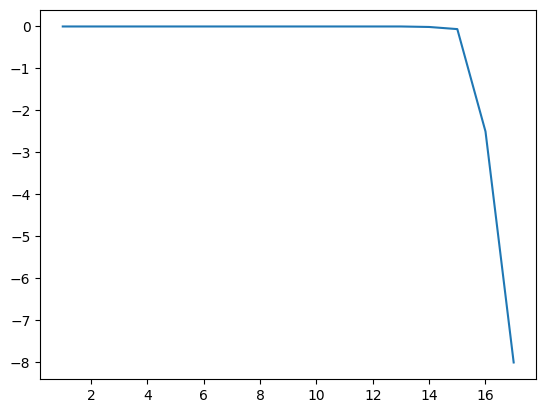

In [ ]:
# Plotting the error
# Solution to chapter 2, problem 11
import matplotlib.pyplot as plt
import numpy as np
def evalpolynaive(coeffs,x):
    p = 0.0
    for i in range(len(coeffs)):
        p = p + coeffs[i]*x**i
    return p
def evalpolyhorner(coeffs,x):
    n = len(coeffs) - 1
    p = coeffs[n]
    for i in range(1,n+1):
        p = p*x + coeffs[n-i]
    return p
x1=[]
y1=[]
for k in range (1,18):
  coeffs = [(-11)**i for i in reversed(range(k))]
  x = 11.01
  print(k,evalpolynaive(coeffs,x),evalpolyhorner(coeffs,x),evalpolynaive(coeffs,x)-evalpolyhorner(coeffs,x))
  x1.append(k)
  y1.append(evalpolynaive(coeffs,x)-evalpolyhorner(coeffs,x))
plt.plot(x1,y1)
plt.show()

<ipython-input-15-42bf18aa14c9>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


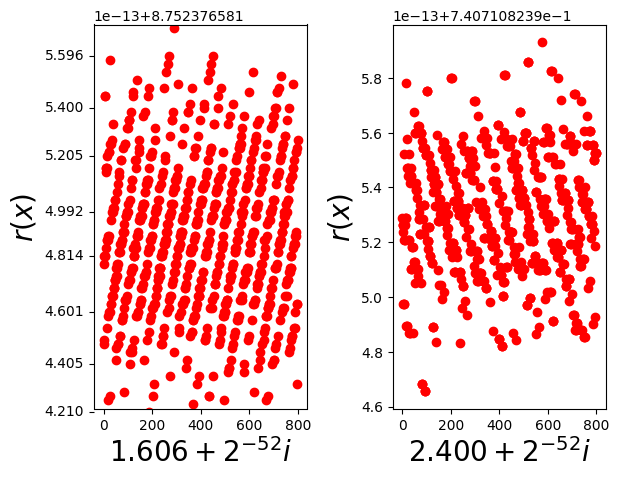

In [ ]:
import matplotlib.pyplot as plt
def hornerpoly(coeffs,x):
    n = len(coeffs) - 1
    p = coeffs[n]

    for i in range(1,n+1):
        p = p*x + coeffs[n-i]

    return p

plt.xlabel('i')
plt.ylabel('r(x)')

coeffsA = [622, -751, 324, -59, 4]
coeffsB = [112, -151, 72, -14, 1]

n = 800
xs = [1.606 + i*(2**(-52)) for i in range(n)]
ys = [hornerpoly(coeffsA,x)/hornerpoly(coeffsB,x) for x in xs]
plt.subplot(1,2,1)
plt.ylim(8.75237658077842,8.75237658077857)
plt.plot(range(n),ys,'ro')
plt.xlabel('$1.606 + 2^{-52}i$', fontsize=20)
plt.ylabel('$r(x)$', fontsize=20)

xs = [2.400 + i*(2**(-52)) for i in range(n)]
ys = [hornerpoly(coeffsA,x)/hornerpoly(coeffsB,x) for x in xs]
plt.subplot(1,2,2)
plt.plot(range(n),ys,'ro')
plt.xlabel('$2.400 + 2^{-52}i$', fontsize=20)
plt.ylabel('$r(x)$', fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


In [ ]:
import sympy
from sympy import *
x = symbols('x')
exprn = 4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622
exprd = x**4 - 14*x**3 + 72*x**2 - 151*x + 112
expr = exprn/exprd
print("Before Simplification : {}".format(expr))
#print("Before Simplification : {}".format(exprd))
# Use sympy.simplify() method
smpln = apart(expr)
smpld = apart(smpln)
print("After Simplification : {}".format(smpln))
print("After Simplification : {}".format(smpld))

Before Simplification : (4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622)/(x**4 - 14*x**3 + 72*x**2 - 151*x + 112)
After Simplification : -3*(x - 2)*(x**2 - 10*x + 29)/(x**4 - 14*x**3 + 72*x**2 - 151*x + 112) + 4
After Simplification : -3*(x - 2)*(x**2 - 10*x + 29)/(x**4 - 14*x**3 + 72*x**2 - 151*x + 112) + 4


<ipython-input-17-3871c19a6669>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


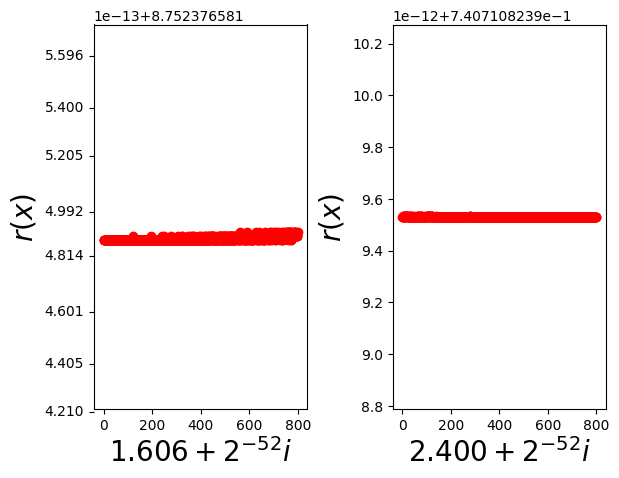

In [ ]:
import matplotlib.pyplot as plt
def evalpolybetter(x):
    x2 = x-2
    x5 = x-5
    num = 3*x2*(x5**2 + 4)
    denom = x + x2**2*(x5**2 + 3)

    return 4 - num/denom
plt.xlabel('i')
plt.ylabel('r(x)')
n = 800
xs = [1.606 + i*(2**(-52)) for i in range(n)]
ys = [evalpolybetter(x) for x in xs]
plt.subplot(1,2,1)
plt.ylim(8.75237658077842,8.75237658077857)
plt.plot(range(n),ys,'ro')
plt.xlabel('$1.606 + 2^{-52}i$', fontsize=20)
plt.ylabel('$r(x)$', fontsize=20)

xs = [2.400 + i*(2**(-52)) for i in range(n)]
ys = [evalpolybetter(x) for x in xs]
plt.subplot(1,2,2)
plt.plot(range(n),ys,'ro')
plt.xlabel('$2.400 + 2^{-52}i$', fontsize=20)
plt.ylabel('$r(x)$', fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

Associative law of algebra

In [ ]:
x=(0.7 + 0.1) + 0.3
print(x)
y= 0.7 + (0.1 + 0.3)
print(y)

1.0999999999999999
1.1


Kahan summation

In [ ]:
def kahansum(xs):
   t=0.;c=0.
   for x in xs:
     t0=t
     y=x-c
     t=t0+y
     c=(t-t0)-y
   return t
xs = [0.7, 0.1, 0.3]
print(sum(xs),kahansum(xs))

1.0999999999999999 1.1


Associative law of algebra with big numbers

In [ ]:
xt = 1.e20; yt = -1.e20; zt = 1.
print((xt + yt) + zt)
print(xt + (yt + zt))

1.0
0.0


In [ ]:
def kahansum(xs):
  t = 0.; c = 0.
  for x in xs:
   t0 = t
   y=x-c
   t = t0 + y
   c = (t - t0) - y
  return t
#  if name == ‘ main ’:
xs = [1.e20,1, -1.e20]
print(sum(xs), kahansum(xs))

0.0 0.0


evaluate function:
$f(x) =\frac{ 1}{\sqrt{x^2 + 1} - x }$ for large values of x.

In [ ]:
from math import sqrt
def func(x):
   return 1/(sqrt(x**2+1) -x)
xs = [10**i for i in range(4,8)]
ys = [func(x) for x in xs]
for x, y in zip(xs,ys):
  print(x,y)

10000 19999.99977764674
100000 200000.22333140278
1000000 1999984.77112922
10000000 19884107.85185185


$f(x) =\frac{ 1}{\sqrt{x^2 + 1} - x }= \frac{\sqrt{x^2 + 1} +x }{(\sqrt{x^2 + 1} - x )(\sqrt{x^2 + 1} + x)}= \sqrt{x^2 + 1} +x  $

In [ ]:
from math import sqrt
def func(x):
   return (sqrt(x**2+1) + x)
xs = [10**i for i in range(4,8)]
ys = [func(x) for x in xs]
for x, y in zip(xs,ys):
  print(x,y)

10000 20000.000050000002
100000 200000.00000499998
1000000 2000000.0000005001
10000000 20000000.000000052


**Calculating the Exponential**

$e^x $

$e^x ≈ \sum_{n=0}^{n_{max}} \frac{ x^n}{n!}$.


$\frac{x^n}{n!} = \frac{x}{n} \frac{x^{n−1}}{(n - 1)!}$

**test for when the new term is “small”**,

terminate the loop when it is determined that adding the  $n^{th}$  term to the running total doesn’t change the sum.

In [ ]:
from math import exp
def compexp(x):
 n=0
 oldsum, newsum, term = 0., 1., 1.
 while newsum != oldsum:
   oldsum = newsum
   n += 1
   term *= x/n
   newsum += term
   print(n, newsum, term)
 return newsum
for x in (0.1, 20., -20.):
 print("x, library exp(x):", x, exp(x))
 val = compexp(x)

x, library exp(x): 0.1 1.1051709180756477
1 1.1 0.1
2 1.105 0.005000000000000001
3 1.1051666666666666 0.0001666666666666667
4 1.1051708333333332 4.166666666666668e-06
5 1.1051709166666666 8.333333333333335e-08
6 1.1051709180555553 1.3888888888888892e-09
7 1.1051709180753966 1.9841269841269846e-11
8 1.1051709180756446 2.480158730158731e-13
9 1.1051709180756473 2.75573192239859e-15
10 1.1051709180756473 2.75573192239859e-17
x, library exp(x): 20.0 485165195.4097903
1 21.0 20.0
2 221.0 200.0
3 1554.3333333333335 1333.3333333333335
4 8221.000000000002 6666.666666666668
5 34887.66666666667 26666.66666666667
6 123776.55555555558 88888.8888888889
7 377744.8095238096 253968.25396825402
8 1012665.4444444446 634920.634920635
9 2423600.1887125224 1410934.744268078
10 5245469.677248678 2821869.488536156
11 10376141.474587142 5130671.797338465
12 18927261.136817917 8551119.662230777
13 32082829.84794219 13155568.711124273
14 50876499.435262576 18793669.58732039
15 75934725.55168976 25058226.1164271

$exp(-x)$ gives error

In [ ]:
from math import exp
def compexp(x):
 n=0
 oldsum, newsum, term = 0., 1., 1.
 while newsum != oldsum:
   oldsum = newsum
   n += 1
   term *= x/n
   newsum += term
   print(n, 1/newsum, term)
 return newsum
for x in ( 0.1,20.):
 print("x, library exp(x):", -x, exp(-x))
 val = compexp(x)

x, library exp(x): -0.1 0.9048374180359595
1 0.9090909090909091 0.1
2 0.9049773755656109 0.005000000000000001
3 0.9048408988086262 0.0001666666666666667
4 0.9048374874171038 4.166666666666668e-06
5 0.9048374191895358 8.333333333333335e-08
6 0.9048374180524097 1.3888888888888892e-09
7 0.9048374180361651 1.9841269841269846e-11
8 0.9048374180359621 2.480158730158731e-13
9 0.9048374180359599 2.75573192239859e-15
10 0.9048374180359599 2.75573192239859e-17
x, library exp(x): -20.0 2.061153622438558e-09
1 0.047619047619047616 20.0
2 0.004524886877828055 200.0
3 0.0006433626420759167 1333.3333333333335
4 0.00012163970319912417 6666.666666666668
5 2.8663424514871535e-05 26666.66666666667
6 8.079074389423952e-06 88888.8888888889
7 2.6472898496225908e-06 253968.25396825402
8 9.874929627411222e-07 634920.634920635
9 4.12609309347853e-07 1410934.744268078
10 1.906406978839908e-07 2821869.488536156
11 9.637493883917857e-08 5130671.797338465
12 5.283384599448294e-08 8551119.662230777
13 3.11693203105

examine the behavior of the function $𝑓(𝑥)=(𝑒^𝑥 − 1)/𝑥$ at small (or perhaps intermediate) x

In [ ]:
from math import exp, log
def f(x):
  return (exp(x) - 1)/x
def g(x):
  w = exp(x)
  if w==0.:
    val = -1/x
  elif w==1.:
    val = 1.
  else:
    val = (w-1)/log(w)
  return val
xs = [10**(-i) for i in (14, 15, 16)]
xs += [-10**(-i) for i in (15, 16, 17)]
fvals = [f(x) for x in xs]
gvals = [g(x) for x in xs]
for x, fval, gval in zip(xs, fvals, gvals):
  print(x, fval, gval)

1e-14 0.9992007221626409 1.000000000000005
1e-15 1.1102230246251565 1.0000000000000004
1e-16 0.0 1.0
-1e-15 0.9992007221626408 0.9999999999999994
-1e-16 1.1102230246251565 1.0
-1e-17 -0.0 1.0
